1. What is Ensemble Learning in machine learning? Explain the key idea behind it.

Ensemble Learning is a powerful technique in machine learning where multiple models are trained and combined to solve a problem — instead of relying on a single model.

Why Ensemble Learning?

A single model may:

Overfit

Be biased

Miss patterns

Perform poorly on new data

But when many models work together, the system becomes:

More accurate

More stable

More generalizable

2. What is the difference between Bagging and Boosting?

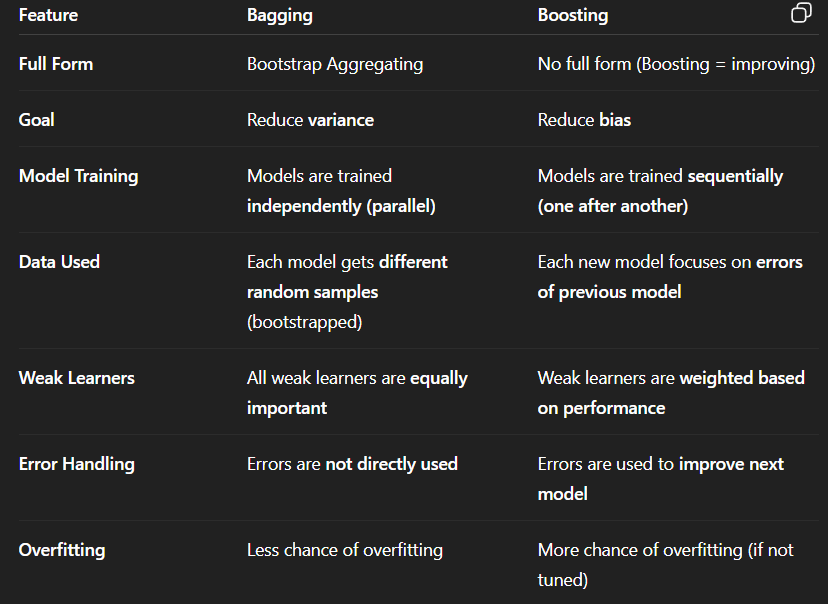


3. What is bootstrap sampling and what role does it play in Bagging methods like Random Forest?


Bootstrap sampling is a statistical method where we create multiple new datasets from the original dataset by randomly selecting samples with replacement.

Key Points:

We select samples randomly

With replacement → same sample can appear multiple times

Each sample set is same size as the original (usually)

It creates different variations of the data

Role of Bootstrap Sampling in Bagging & Random Forest
Bagging = Bootstrap Aggregating

The “B” in Bagging stands for Bootstrap.

Here's how it works:

Multiple bootstrap samples are drawn
— e.g., 100 samples → 100 datasets

A separate model is trained on each sample
(In Random Forest: many decision trees)

The predictions are combined

Classification → Majority Vote

Regression → Average

4. What are Out-of-Bag (OOB) samples and how is OOB score used to evaluate ensemble models?


In Bootstrap Sampling (used in Bagging & Random Forest), each tree is trained on a dataset created by sampling with replacement.

Because of this:

About 63% of the data is selected for training

The remaining ~37% data is NOT selected

These unselected data points are called:

 Out-of-Bag (OOB) samples

(Meaning: they were LEFT OUT of the Bag)

Step-by-step:

Build N trees using bootstrap samples

For each tree:

Some samples were not used (OOB samples)

Use only OOB samples to test that tree

Collect predictions for each sample
(from trees where this sample was OOB)

Compare predictions vs true labels

Compute accuracy → This is OOB Score

5. Compare feature importance analysis in a single Decision Tree vs. a Random Forest.


Feature Importance in Decision Tree vs Random Forest
1. Decision Tree — Feature Importance

In a single decision tree, feature importance is based on:

How much each feature reduces impurity

(Ex: Gini Index or Entropy)

When the tree splits using a feature, it reduces impurity

The more a feature reduces impurity → the more important it is

Key points:

Importance depends on single model structure

It may overfit and give unstable importance

A small change in data can change selected features


2. Random Forest — Feature Importance

A Random Forest builds many trees, each on:

different bootstrap samples

random subset of features
(max_features)

Feature importance is averaged across all trees

This gives:

✔ More stable
✔ More reliable
✔ Less sensitive to noise
✔ Less overfitting

Question 6: Write a Python program to:
● Load the Breast Cancer dataset using
sklearn.datasets.load_breast_cancer()
● Train a Random Forest Classifier
● Print the top 5 most important features based on feature importance scores.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Create Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract feature importance
importances = rf.feature_importances_

# Create a DataFrame for better readability
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

# Print Top 5 features
print("Top 5 Most Important Features:")
print(feat_imp_df.head(5))


Top 5 Most Important Features:
                 Feature  Importance
23            worst area    0.139357
27  worst concave points    0.132225
7    mean concave points    0.107046
20          worst radius    0.082848
22       worst perimeter    0.080850


Question 7: Write a Python program to:
● Train a Bagging Classifier using Decision Trees on the Iris dataset
● Evaluate its accuracy and compare with a single Decision Tree


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load Iris Dataset
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --------------------------
# 1️⃣ Single Decision Tree
# --------------------------
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

# --------------------------
# 2️⃣ Bagging Classifier
# --------------------------
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(), # Changed 'base_estimator' to 'estimator'
    n_estimators=50,
    random_state=42
)

bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
bag_acc = accuracy_score(y_test, bag_pred)

# --------------------------
# Print Results
# --------------------------
print("Decision Tree Accuracy: ", dt_acc)
print("Bagging Classifier Accuracy: ", bag_acc)

Decision Tree Accuracy:  1.0
Bagging Classifier Accuracy:  1.0


Question 8: Write a Python program to:
● Train a Random Forest Classifier
● Tune hyperparameters max_depth and n_estimators using GridSearchCV
● Print the best parameters and final accuracy


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Random Forest Model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 8, None]
}

# Grid Search
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train GridSearch
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:")
print(grid.best_params_)

# Best model
best_model = grid.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("\nFinal Random Forest Accuracy:", acc)


Best Parameters:
{'max_depth': 8, 'n_estimators': 200}

Final Random Forest Accuracy: 0.9649122807017544


Question 9: Write a Python program to:
● Train a Bagging Regressor and a Random Forest Regressor on the California
Housing dataset
● Compare their Mean Squared Errors (MSE)


In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load Dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

bag = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)

bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
bag_mse = mean_squared_error(y_test, bag_pred)


rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)


print("Bagging Regressor MSE:", bag_mse)
print("Random Forest MSE:", rf_mse)


Bagging Regressor MSE: 0.2572988359842641
Random Forest MSE: 0.2553684927247781


Question 10: You are working as a data scientist at a financial institution to predict loan
default. You have access to customer demographic and transaction history data.
You decide to use ensemble techniques to increase model performance.
Explain your step-by-step approach to:
● Choose between Bagging or Boosting
● Handle overfitting
● Select base models
● Evaluate performance using cross-validation
● Justify how ensemble learning improves decision-making in this real-world
context.


1) First: quick problem checklist

Before choosing algorithms, confirm:

Target: binary (default / no-default) — likely imbalanced.

Data size: number of rows, features.

Noise level and label quality (label noise common in finance).

Business metric: is false negative (missed default) worse than false positive? (usually yes)

Latency / explainability requirements for production.

Knowing these informs Bagging vs Boosting, metrics, and tradeoffs.

2) Choose between Bagging vs Boosting

Use Bagging (e.g., Random Forest) if:

You suspect high variance models (trees overfitting) and you want stable predictions.

Data contains noisy features but you want robustness.

You want quick, easy-to-tune baseline with good feature importance.

You need model that is relatively easier to interpret and faster to train in parallel.

Use Boosting (e.g., XGBoost / LightGBM / CatBoost) if:

You want maximum predictive performance (usually boosting wins on tabular data).

Problem benefits from modeling complex interactions and correcting errors sequentially.

You can carefully tune hyperparameters and guard against overfitting.

You can accept longer training time and more complex models.